# GenAI Chatbot For Prehab4Me



| | |
|-|-|
|Author(s) | Tanveer Bhatia, Sumrah Fatima, Washiur Rahaman |

## Overview

### Prehab4Me on Gemini 1.5 Pro

Gemini 1.5 Pro is a new language model from the Gemini family. This model introduces a long context window of up to 1 million tokens that can seamlessly analyze large amounts of information. Additionally, it is multimodal with the ability to process text, images, audio, video, and code. Learn more about [Gemini 1.5 Pro](https://deepmind.google/technologies/gemini/pro/).

### Gemini 1.5 Flash

This smaller Gemini model is optimized for high-frequency tasks to prioritize the model's response time. This model has superior speed and efficiency with a context window of up to 1 million tokens for all modalities. Learn more about [Gemini 1.5 Flash](https://deepmind.google/technologies/gemini/flash/).

In this workshop tutorial, you will learn how to use the Vertex AI SDK for Python to interact with the Gemini 1.5 Pro and Gemini 1.5 Flash models to:
  - Cover individual text, PDF, image, video, code, and audio scenarios
  - Consider different modality combinations
  - Run through an e-commerce use case


## Getting Started


### Install Vertex AI SDK for Python


In [1]:
%pip install --upgrade --user google-cloud-aiplatform\
                                        gitpython \
                                        magika

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this director

### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [2]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.


In [1]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project information and initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [2]:
PROJECT_ID = "hypnotic-seat-443315-a1"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

import vertexai

vertexai.init(project=PROJECT_ID, location=LOCATION)

### Import libraries


In [3]:
from vertexai.generative_models import GenerativeModel, Image, Part

### Use the Gemini 1.5 models

Gemini 1.5 Pro and Gemini 1.5 Flash are multimodal models that support multimodal prompts. You can include text, image(s), and video in your prompt requests.


In [4]:
multimodal_model = GenerativeModel("gemini-1.5-pro")

multimodal_model_flash = GenerativeModel("gemini-1.5-flash")

### Define helper functions


In [5]:
import http.client
import typing
import urllib.request

from IPython.core.interactiveshell import InteractiveShell
import IPython.display

InteractiveShell.ast_node_interactivity = "all"


def get_image_bytes_from_url(image_url: str) -> bytes:
    with urllib.request.urlopen(image_url) as response:
        response = typing.cast(http.client.HTTPResponse, response)
        image_bytes = response.read()
    return image_bytes


def load_image_from_url(image_url: str) -> Image:
    image_bytes = get_image_bytes_from_url(image_url)
    return Image.from_bytes(image_bytes)


def display_content_as_video(content: str | Image | Part):
    if not isinstance(content, Part):
        return False
    part = typing.cast(Part, content)
    file_path = part.file_data.file_uri.removeprefix("gs://")
    video_url = f"https://storage.googleapis.com/{file_path}"
    IPython.display.display(IPython.display.Video(video_url, width=350))

## Individual Modalities

In [6]:
pdf_file_uri = "https://storage.googleapis.com/prehabformedataweek1/Eating-Well-for-Surgery-Video-Transcription.pdf"
pdf_file = Part.from_uri(pdf_file_uri, mime_type="application/pdf")

prompt = "How to eat well for surgery"

contents = [pdf_file, prompt]

response = multimodal_model.generate_content(contents)
display(IPython.display.Markdown(response.text))

The video transcript discusses the importance of nutrition before surgery and provides four key tips for eating well in the weeks leading up to a surgical procedure. 

**Tip 1: Eat Regularly**

- Eat every 3-4 hours while awake.
- Aim for 3 meals and 1 evening snack daily.
- This ensures a steady energy supply for daily activities and exercise.

**Tip 2: Eat Enough Protein**

- Aim for at least 25-30 grams of protein per meal and snack.
- Protein supports muscle strength, immune function, and overall healing.
- Consult a dietitian or healthcare professional for personalized protein needs.

**Tip 3: Drink Enough Fluids**

- Most adults need 9-12 cups (2.25-3 liters) of fluids daily.
- Water is essential for hydration and healing.
- Consume high-water-content foods like soups, smoothies, and fruits.

**Tip 4: Support Bone Health**

- Eat calcium and vitamin D-rich foods for strong bones.
- Include dairy products, fortified alternatives, and leafy greens in your diet.

The transcript emphasizes that these healthy eating habits can benefit patients both before and after surgery, contributing to overall health and well-being. It also encourages viewers to seek guidance from their healthcare team for personalized recommendations and support throughout their surgical journey. 


In [7]:
prompt = """
How much protein should I intake everyday?
"""

contents = [pdf_file, prompt]

response = multimodal_model.generate_content(contents)
display(IPython.display.Markdown(response.text))

The document recommends at least 25–30 grams of protein at each meal and snack. However, it's best to consult with a dietitian or a healthcare professional to determine the right amount of protein for you based on your health and activity level. 


### Image understanding across multiple images

One of Gemini's capabilities is being able to reason across multiple images to provide recommendations.

This is an example using Gemini 1.5 Pro to reason which glasses would be more suitable for an oval face shape:


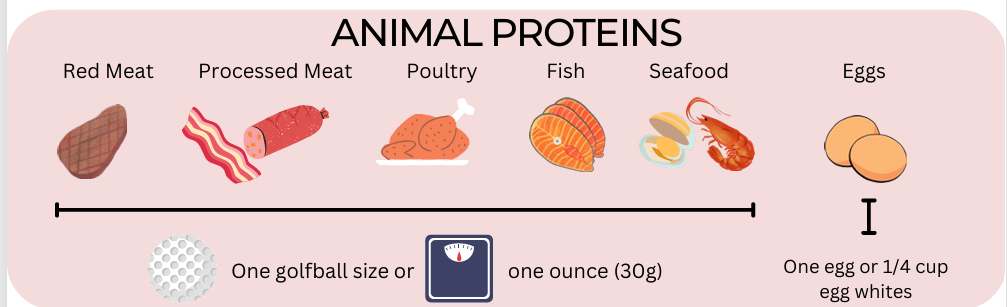

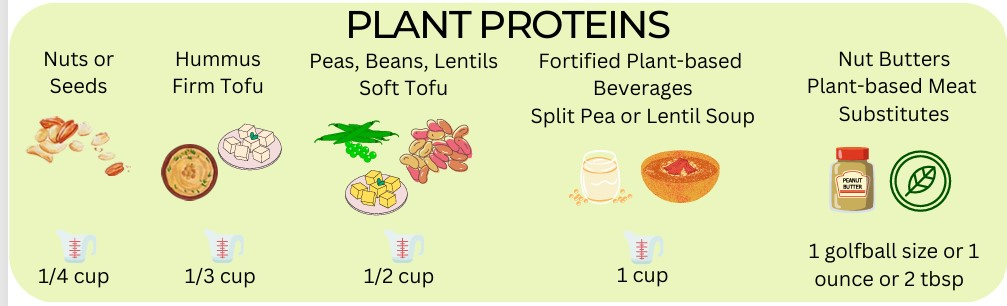

According to the chart, sources of animal protein include: 

* Red meat
* Processed meat
* Poultry
* Fish
* Seafood
* Eggs 


In [8]:
image_glasses1_url = "https://storage.googleapis.com/prehabformedataweek1/image1prehab.png"
image_glasses2_url = "https://storage.googleapis.com/prehabformedataweek1/image2prehab.jpg"
image_glasses1 = load_image_from_url(image_glasses1_url)
image_glasses2 = load_image_from_url(image_glasses2_url)

prompt = """
Name different sources of animal protiens
"""

IPython.display.Image(image_glasses1_url, width=150)
IPython.display.Image(image_glasses2_url, width=150)

contents = [prompt, image_glasses1, image_glasses2]
responses = multimodal_model.generate_content(contents)
display(IPython.display.Markdown(responses.text))

### Generating a video description


In [ ]:
#prompt = """
#What is shown in this video?
#Where should I go to see it?
#What are the top 5 places in the world that look like this?
#"""
#video = Part.from_uri(
 #   uri="gs://github-repo/img/gemini/multimodality_usecases_overview/mediterraneansea.mp4",
  #  mime_type="video/mp4",
#)
#contents = [prompt, video]

#responses = multimodal_model.generate_content(contents)

#display_content_as_video(video)
#display(IPython.display.Markdown(responses.text))

> You can confirm that this is indeed the Confederation Line on Wikipedia here: https://en.wikipedia.org/wiki/Confederation_Line


### Reason across a codebase

You will use the Online Boutique repo as an example in this notebook. Online Boutique is a cloud-first microservices demo application. The application is a web-based e-commerce app where users can browse items, add them to the cart, and purchase them. This application consists of 11 microservices across multiple languages.

In [ ]:
# The GitHub repository URL
#repo_url = "https://github.com/GoogleCloudPlatform/microservices-demo"  # @param {type:"string"}

# The location to clone the repo
#repo_dir = "./repo"

#### Define helper functions for processing GitHub repository


In [ ]:
# import os
# from pathlib import Path
# import shutil

# import git
# import magika

# m = magika.Magika()


# def clone_repo(repo_url, repo_dir):
#     """Clone a GitHub repository"""

#     if os.path.exists(repo_dir):
#         shutil.rmtree(repo_dir)
#     os.makedirs(repo_dir)
#     git.Repo.clone_from(repo_url, repo_dir)


# def extract_code(repo_dir):
#     """Create an index, extract content of code/text files"""

#     code_index = []
#     code_text = ""
#     for root, _, files in os.walk(repo_dir):
#         for file in files:
#             file_path = os.path.join(root, file)
#             relative_path = os.path.relpath(file_path, repo_dir)
#             code_index.append(relative_path)

#             file_type = m.identify_path(Path(file_path))
#             if file_type.output.group in ("text", "code"):
#                 try:
#                     with open(file_path) as f:
#                         code_text += f"----- File: {relative_path} -----\n"
#                         code_text += f.read()
#                         code_text += "\n-------------------------\n"
#                 except Exception:
#                     pass

#     return code_index, code_text

#### Create an index and extract the contents of a codebase

Clone the repo and create an index and extract content of code/text files.

In [ ]:
# clone_repo(repo_url, repo_dir)

# code_index, code_text = extract_code(repo_dir)

#### Define a helper function to generate a prompt to a code related question


In [ ]:
# def get_code_prompt(question):
#     """Generates a prompt to a code related question."""

#     prompt = f"""
#     Questions: {question}

#     Context:
#     - The entire codebase is provided below.
#     - Here is an index of all of the files in the codebase:
#       \n\n{code_index}\n\n.
#     - Then each of the files is concatenated together. You will find all of the code you need:
#       \n\n{code_text}\n\n

#     Answer:
#   """

#     return prompt

#### Create a developer getting started guide

In [ ]:
# question = """
#   Provide a getting started guide to onboard new developers to the codebase.
# """

# prompt = get_code_prompt(question)
# contents = [prompt]

# responses = multimodal_model.generate_content(contents, stream=True)
# for response in responses:
#     IPython.display.Markdown(response.text)

#### Finding bugs in the code

In [ ]:
# question = """
#   Find the top 3 most severe issues in the codebase.
# """

# prompt = get_code_prompt(question)
# contents = [prompt]

# responses = multimodal_model.generate_content(contents, stream=True)
# for response in responses:
#     IPython.display.Markdown(response.text)

#### Summarizing the codebase with Gemini 1.5 Flash

In [ ]:
# question = """
#   Give me a summary of this codebase, and tell me the top 3 things that I can learn from it.
# """

# prompt = get_code_prompt(question)
# contents = [prompt]

# # Generate text using non-streaming method
# response = multimodal_model_flash.generate_content(contents)
# IPython.display.Markdown(response.text)

### Audio understanding

Gemini 1.5 Pro can directly process audio for long-context understanding.

In [ ]:
# audio_file_path = "cloud-samples-data/generative-ai/audio/pixel.mp3"
# audio_file_uri = f"gs://{audio_file_path}"
# audio_file_url = f"https://storage.googleapis.com/{audio_file_path}"

# IPython.display.Audio(audio_file_url)

#### Summarization

In [ ]:
# prompt = """
#   Please provide a short summary and title for the audio.
#   Provide chapter titles, be concise and short, no need to provide chapter summaries.
#   Provide each of the chapter titles in a numbered list.
#   Do not make up any information that is not part of the audio and do not be verbose.
# """

# audio_file = Part.from_uri(audio_file_uri, mime_type="audio/mpeg")
# contents = [audio_file, prompt]

# response = multimodal_model.generate_content(contents)
# IPython.display.Markdown(response.text)

#### Transcription using Gemini 1.5 Flash

In [ ]:
# prompt = """
#     Can you transcribe this interview, in the format of timecode, speaker, caption.
#     Use speaker A, speaker B, etc. to identify the speakers.
#     Please provide each piece of information on a separate bullet point.
# """

# audio_file = Part.from_uri(audio_file_uri, mime_type="audio/mpeg")
# contents = [audio_file, prompt]

# responses = multimodal_model_flash.generate_content(contents)

# IPython.display.Markdown(responses.text)

## Combining multiple modalities

### All modalities (images, video, audio, text) at once

Gemini 1.5 Pro is natively multimodal and supports interleaving of data from different modalities. It can support a mix of audio, visual, text, and code inputs in the same input sequence.

In [9]:
# !pip install gradio
# import gradio as gr


# # Configure Google Generative AI API

# # PDF URLs (fixed internally)
# pdf_urls = {
#     "Eating Well for Surgery": "https://storage.googleapis.com/prehabformedataweek1/Eating-Well-for-Surgery-Video-Transcription.pdf",
#     "Protein Cheat Sheet": "https://storage.googleapis.com/prehabformedataweek1/Protein-Cheat-Sheet.pdf",
#     "How to Use a Recipe": "https://storage.googleapis.com/prehabformedataweek1/if-nfs-how-to-use-a-recipe.pdf"
# }

# #video_file_uri = "https://storage.googleapis.com/prehabformedataweek1/week3_video1.mp4"
# #video_file = Part.from_uri(video_file_uri, mime_type="video/mp4")
# #ideo_file_uri = f"gs://prehabformedataweek1/week3_video1.mp4"
# # Function to generate a response (internal PDFs + query)
# def generate_response(query):
#     # Use all PDFs internally
#     query = query + " in the given data"
#     contents = [
#         Part.from_uri(pdf_urls["Eating Well for Surgery"], mime_type="application/pdf"),
#         Part.from_uri(pdf_urls["Protein Cheat Sheet"], mime_type="application/pdf"),
#         Part.from_uri(pdf_urls["How to Use a Recipe"], mime_type="application/pdf"),
#         #Part.from_uri(video_file_uri, mime_type="video/mp4"),
#         query
#     ]

#     # Generate content using the multimodal model
#     response = multimodal_model.generate_content(contents)
#     return response.text


# # Gradio Interface
# interface = gr.Interface(
#     fn=generate_response,
#     inputs=gr.Textbox(label="Enter your query", placeholder="e.g., How to eat well for surgery?"),
#     outputs=gr.Textbox(label="Model Response", lines=10),
#     title="Prehab4Me GenAi Chatbot",
#     description="Ask questions about Eating Well, Protein, or Recipes, and get responses from PDFs, Images & Videos."
# )

# # Launch the Gradio app
# interface.launch()




!pip install gradio
import gradio as gr

# PDF URLs (fixed internally)
pdf_urls = {
    "Eating Well for Surgery": "https://storage.googleapis.com/prehabformedataweek1/Eating-Well-for-Surgery-Video-Transcription.pdf",
    "Protein Cheat Sheet": "https://storage.googleapis.com/prehabformedataweek1/Protein-Cheat-Sheet.pdf",
    "How to Use a Recipe": "https://storage.googleapis.com/prehabformedataweek1/if-nfs-how-to-use-a-recipe.pdf"
}

# Function to generate a response (internal PDFs + query)
def generate_response(query, history):
    # Combine query with the existing history
    conversation = "\n".join(history) + f"\nUser: {query}"
    conversation += "\nAI:"  # Prompt the model for the next response

    # Use all PDFs internally
    query_context = query + " in the given data"
    contents = [
        Part.from_uri(pdf_urls["Eating Well for Surgery"], mime_type="application/pdf"),
        Part.from_uri(pdf_urls["Protein Cheat Sheet"], mime_type="application/pdf"),
        Part.from_uri(pdf_urls["How to Use a Recipe"], mime_type="application/pdf"),
        query_context
    ]

    # Generate content using the multimodal model
    response = multimodal_model.generate_content(contents)

    # Update history with the new interaction
    history.append(f"User: {query}")
    history.append(f"AI: {response.text}")

    # Return the updated history for display
    return "\n".join(history), history


# Gradio Interface
interface = gr.Interface(
    fn=generate_response,
    inputs=[
        gr.Textbox(label="Enter your query", placeholder="e.g., How to eat well for surgery?"),  # User input
        gr.State([])  # Chat history state
    ],
    outputs=[
        gr.Textbox(label="Chat History", lines=15),  # Display chat history
        gr.State([])  # Updated state
    ],
    title="Prehab4Me GenAi Chatbot",
    description="Ask questions about Eating Well, Protein, or Recipes, and get responses from PDFs, Images & Videos."
)

# Launch the Gradio app
interface.launch()










   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cc79642471e9c3d381.gradio.live

This share link expires in 72 hours.

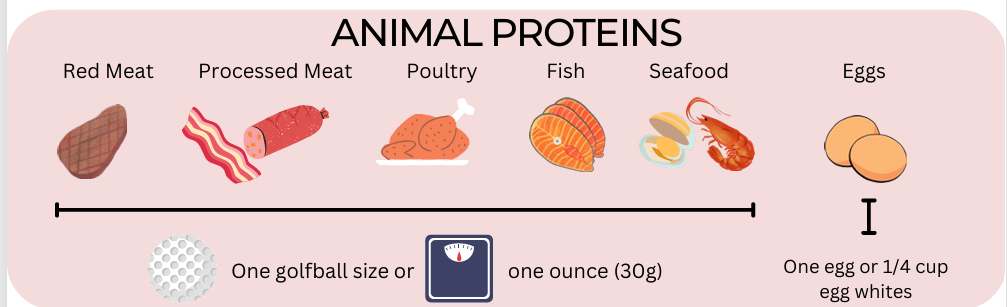

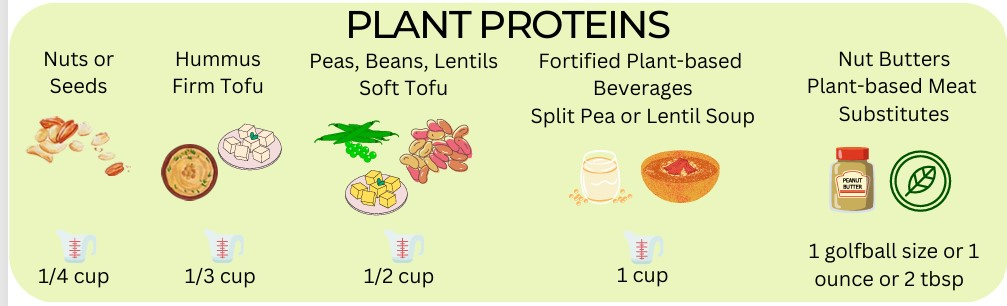

The top image lists different sources of animal protein.  They are:

* **Red meat:**  Beef, pork, lamb
* **Processed meat:** Bacon, sausage, deli meats. 
* **Poultry:** Chicken, turkey, duck 
* **Fish:** Salmon, tuna, cod
* **Seafood:**  Shrimp, crab, lobster, mussels 
* **Eggs:** Chicken eggs, duck eggs


In [10]:

image_glasses1_url = "https://storage.googleapis.com/prehabformedataweek1/image1prehab.png"
image_glasses2_url = "https://storage.googleapis.com/prehabformedataweek1/image2prehab.jpg"
image_glasses1 = load_image_from_url(image_glasses1_url)
image_glasses2 = load_image_from_url(image_glasses2_url)

prompt = """
Name different sources of animal protiens
"""

IPython.display.Image(image_glasses1_url, width=150)
IPython.display.Image(image_glasses2_url, width=150)

contents = [prompt, image_glasses1, image_glasses2]
responses = multimodal_model.generate_content(contents)
display(IPython.display.Markdown(responses.text))

In [11]:
!pip install gradio
import gradio as gr

# PDF URLs (fixed internally)
pdf_urls = {
    "Eating Well for Surgery": "https://storage.googleapis.com/prehabformedataweek1/Eating-Well-for-Surgery-Video-Transcription.pdf",
    "Protein Cheat Sheet": "https://storage.googleapis.com/prehabformedataweek1/Protein-Cheat-Sheet.pdf",
    "How to Use a Recipe": "https://storage.googleapis.com/prehabformedataweek1/if-nfs-how-to-use-a-recipe.pdf"
}

# Function to generate a response (internal PDFs + query)
def generate_response(query, history):
    # Combine query with the existing history
    conversation = "\n".join(history) + f"\nUser: {query}"
    conversation += "\nAI:"  # Prompt the model for the next response

    # Use all PDFs internally
    query_context = query + " in the given data"
    contents = [
        Part.from_uri(pdf_urls["Eating Well for Surgery"], mime_type="application/pdf"),
        Part.from_uri(pdf_urls["Protein Cheat Sheet"], mime_type="application/pdf"),
        Part.from_uri(pdf_urls["How to Use a Recipe"], mime_type="application/pdf"),
        query_context
    ]

    # Generate content using the multimodal model
    response = multimodal_model.generate_content(contents)

    # Update history with the new interaction
    history.append(f"User: {query}")
    history.append(f"AI: {response.text}")

    # Return the updated history for display
    return "\n".join(history), history


# Gradio Interface
interface = gr.Interface(
    fn=generate_response,
    inputs=[
        gr.Textbox(label="Enter your query", placeholder="e.g., How to eat well for surgery?"),  # User input
        gr.State([])  # Chat history state
    ],
    outputs=[
        gr.Textbox(label="Chat History", lines=15),  # Display chat history
        gr.State([])  # Updated state
    ],
    title="Prehab4Me GenAi Chatbot",
    description="Ask questions about Eating Well, Protein, or Recipes, and get responses from PDFs, Images & Videos."
)

# Launch the Gradio app
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b092db1e0be23e3dc1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [12]:
!pip install gradio

import gradio as gr
import json

# PDF URLs (fixed internally)
pdf_urls = {
    "Eating Well for Surgery": "https://storage.googleapis.com/prehabformedataweek1/Eating-Well-for-Surgery-Video-Transcription.pdf",
    "Protein Cheat Sheet": "https://storage.googleapis.com/prehabformedataweek1/Protein-Cheat-Sheet.pdf",
    "How to Use a Recipe": "https://storage.googleapis.com/prehabformedataweek1/if-nfs-how-to-use-a-recipe.pdf"
}

# Feedback storage
feedback_data = []

# Function to generate a response (internal PDFs + query)
def generate_response(query, history):
    # Combine query with the existing history
    conversation = "\n".join(history) + f"\nUser: {query}"
    conversation += "\nAI:"  # Prompt the model for the next response

    # Use all PDFs internally
    query_context = query + " in the given data"
    contents = [
        Part.from_uri(pdf_urls["Eating Well for Surgery"], mime_type="application/pdf"),
        Part.from_uri(pdf_urls["Protein Cheat Sheet"], mime_type="application/pdf"),
        Part.from_uri(pdf_urls["How to Use a Recipe"], mime_type="application/pdf"),
        query_context
    ]

    # Generate content using the multimodal model
    response = multimodal_model.generate_content(contents)

    # Update history with the new interaction
    history.append(f"User: {query}")
    history.append(f"AI: {response.text}")

    # Return the updated history for display
    return "\n".join(history), history, response.text


# Function to collect feedback and save it to JSON
def collect_feedback(response, feedback, history):
    # Append feedback to the list
    feedback_entry = {"response": response, "feedback": feedback, "history": history}
    feedback_data.append(feedback_entry)

    # Save feedback to a JSON file
    with open("feedback_data.json", "w") as json_file:
        json.dump(feedback_data, json_file, indent=4)

    return f"Feedback received: {feedback}"


# Gradio Interface
with gr.Blocks() as demo:
    # Input for user query
    query = gr.Textbox(label="Enter your query", placeholder="e.g., How to eat well for surgery?")

    # Chat history
    chat_history = gr.Textbox(label="Chat History", lines = 5,  interactive=False)
    response_output = gr.Textbox(label="Model Response", interactive=False)

    # Buttons for feedback
    feedback_buttons = gr.Radio(["Like", "Dislike"], label="Feedback on Response")
    feedback_result = gr.Textbox(label="Feedback Status", interactive=False)

    # State for history
    history_state = gr.State([])

    # Buttons for generating a response
    generate_btn = gr.Button("Generate Response")
    feedback_btn = gr.Button("Submit Feedback")

    # Link functionality
    generate_btn.click(
        generate_response,
        inputs=[query, history_state],
        outputs=[chat_history, history_state, response_output]
    )
    feedback_btn.click(
        collect_feedback,
        inputs=[response_output, feedback_buttons, history_state],
        outputs=[feedback_result]
    )
# Launch the app
demo.launch()


{'id': 0,
 'targets': [(43, 'click')],
 'inputs': [37, 42],
 'outputs': [38, 42, 39],
 'backend_fn': True,
 'js': None,
 'queue': True,
 'api_name': 'generate_response',
 'scroll_to_output': False,
 'show_progress': 'full',
 'batch': False,
 'max_batch_size': 4,
 'cancels': [],
 'types': {'generator': False, 'cancel': False},
 'collects_event_data': False,
 'trigger_after': None,
 'trigger_only_on_success': False,
 'trigger_mode': 'once',
 'show_api': True,
 'zerogpu': False,
 'rendered_in': None,
 'connection': 'sse',
 'time_limit': None,
 'stream_every': 0.5,
 'like_user_message': False,
 'event_specific_args': None}

{'id': 1,
 'targets': [(44, 'click')],
 'inputs': [39, 40, 42],
 'outputs': [41],
 'backend_fn': True,
 'js': None,
 'queue': True,
 'api_name': 'collect_feedback',
 'scroll_to_output': False,
 'show_progress': 'full',
 'batch': False,
 'max_batch_size': 4,
 'cancels': [],
 'types': {'generator': False, 'cancel': False},
 'collects_event_data': False,
 'trigger_after': None,
 'trigger_only_on_success': False,
 'trigger_mode': 'once',
 'show_api': True,
 'zerogpu': False,
 'rendered_in': None,
 'connection': 'sse',
 'time_limit': None,
 'stream_every': 0.5,
 'like_user_message': False,
 'event_specific_args': None}

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dabe0fcd2052c9d720.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
video_url = "https://storage.googleapis.com/prehabformedataweek1/week3_video1.mp4"
video_file_path = "cloud-samples-data/generative-ai/video/behind_the_scenes_pixel.mp4"
video_file_uri = f"gs://prehabformedataweek1/week3_video1.mp4"
videofile = Part.from_uri(video_file_uri, mime_type="video/mp4")

prompt = "what are the important nutrients for building strong bones"

contents = [videofile, prompt]

response = multimodal_model.generate_content(contents)
display(IPython.display.Markdown(response.text))

Sure. Here are the important nutrients for building strong bones:

* Calcium
* Vitamin D
* Phosphorus
* Potassium
* Magnesium
* Protein

Let me know if you need more information. 